In [33]:
import numpy as np
import random
from typing import List
import  matplotlib.pyplot as plt
from scipy.special import loggamma

In [34]:
def prob(M: np.matrix, order: List[int]):
    p = 0.0
    for i in range(1, len(order)):
        sl = np.array(2 * M[:, order[i - 1]] + M[:, order[i]])
        ns = [sum(sl == j) for j in range(0, 4)]
        p -= loggamma(ns[0] + ns[1] + 1/2) + loggamma(ns[2] + ns[3] + 1/2)
        p += sum(map(lambda n: loggamma(n + 1/4), ns))
    return p

In [35]:
def breed(seq1, seq2, subset_len=0.5):
    seq1_len = seq1.shape[0]
    start = np.random.randint(0, int(seq1_len * subset_len) - 1) 
    stop = start + int(seq1_len * subset_len) - 1
    child = np.zeros_like(seq1) - 1
    child[start: stop] = seq1[start: stop]
    
    seq_rev = list(reversed(seq2))
    for i in range(seq1_len):
        if child[i] == -1:
            elem = -1
            while(elem in child):
                elem = seq_rev.pop()
            
            child[i] = elem
    
    return child

In [36]:
def mutate(order):
    i, j = random.sample(range(0, len(order) - 1), 2)
    order[i], order[j] = order[j], order[i]
    return order

In [37]:
def ga(matrix, order, pop_size=150, elite_size=0.8, generations=200, mut_prob=0.01):
    print('Initial: ', prob(matrix, order))
    population = [random.sample(order, len(order)) for _ in range(pop_size)]
    # population = [order for _ in range(pop_size)]
    probs = []
    probs_mean = []
    for i in range(generations):
    
        # fitness function
        ranked = sorted([(i, prob(matrix, x)) for i, x in enumerate(population)], 
                        reverse=True, key=lambda item: item[1])
                        
        # choose best in these generation
        elite = ranked[0: int(pop_size * elite_size)]
        elite_indexes = [i[0] for i in elite]

        # breed
        children = []
        for _ in range(int(pop_size-pop_size*elite_size)):
            i, j = random.sample(elite_indexes, 2)
            children.append(breed(np.array(population[i]), np.array(population[j])))
        population = [population[i] for i in elite_indexes] + children

        # mutate
        for i in range(len(population)):
            if np.random.random() < mut_prob:
                mutate(population[i])
        probs_mean.append(np.mean([prob(matrix, elem) for elem in population[:5]]))
        probs.append(prob(matrix, population[0]))
    print('Final: ', probs[-1])
    return probs, probs_mean

In [38]:
def ga_plot(probs):    
    plt.plot(probs)
    plt.ylabel('Log Probability')
    plt.xlabel('Generation')

In [39]:
def test_mutate(order):
    for _ in range(1000):
        assert order == mutate(order)

In [40]:
def test_perms(order):
    for _ in range(1000):
        seq1 = np.array(random.sample(order, len(order)))
        seq2 = np.array(random.sample(order, len(order)))
        child = breed(seq1, seq2, 0.5) 
        assert sum(child) == sum(seq1)

Initial:  -1006.5162822312509
Final:  -880.6953277776759


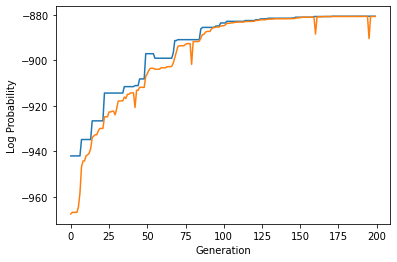

In [42]:
    path = 'matrix.csv'
    population = np.loadtxt(path, dtype='i', delimiter=' ')
    order = [i for i in range(len(population[0]))]
    order = random.sample(order, len(order))
    probs, probs_mean = ga(population, order)
    ga_plot(probs)
    ga_plot(probs_mean)
    plt.show()